# 6장. 결정 트리

https://nbviewer.jupyter.org/github/rickiepark/handson-ml/tree/master/

이 코드의 내용은 Hands-On Machine Learning with Scikit-Learn & TensorFlow을 참고했음을 밝힙니다.

## 결정 트리(Decision Tree)(p225)

* 분류와 회귀 작업 그리고 다중출력 작업도 가능한 다재다능한 머신러닝 알고리즘
* 매우 복잡한 데이터셋도 학습할 수 있는 강력한 알고리즘
* 최근에 자주 사용되는 가장 강력한 머신러닝 알고리즘 중 하나인 랜덤 포레스트의 기본 구성 요소
* 데이터 전처리가 거의 필요하지 않다
* 특성의 스케일을 맞추거나 평균을 원점에 맞추는 작업이 필요하지 않다

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:,2:] # 꽃잎의 길이와 너비
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [11]:
import os

# 그림을 저장할 폴드
PROJECT_ROOT_DIR = "."

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR,fig_id)

# export_graphviz() 함수를 사용해 그래프 정의를 iris_tree.dot 파일로 출력하여 훈련된 결정 트리를 시각화할 수 있습니다.
# 이 .dot 파일을 graphviz 패키지에 있는 dot 명령줄 도구로 PDF나 PNG 같은 포맷으로 변경합니다.
# $ conda install python -graphviz (graphviz 설치)
# $ dot -Tpng iris_tree.dot -o iris_tree.png (.dot파일을 .png 이미지로 변경)
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=image_path("iris_tree.dot"),
        feature_names=["꽃잎 길이 (cm)", "꽃잎 너비 (cm)"],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

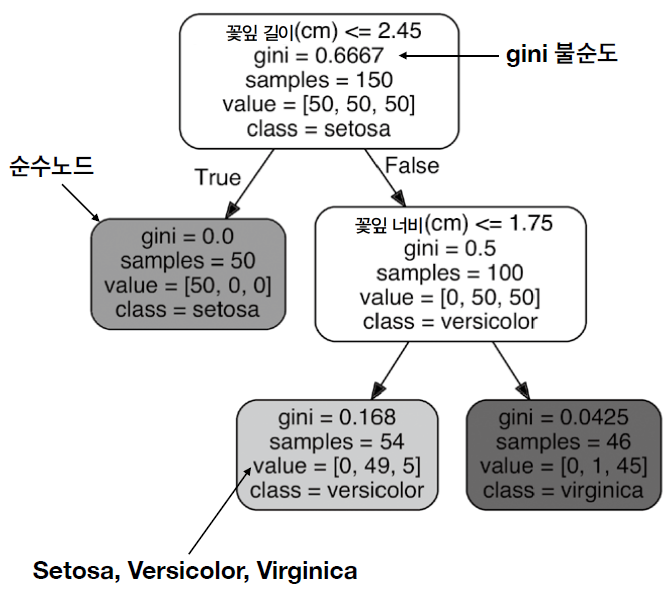

새로 발견한 붓꽃의 품종을 분류하려 한다고 가정하겠습니다. 먼저 루트 노드(root node, 깊이가 0인 맨 꼭대기의 노드)에서 시작합니다. 이 노드는 꽃잎의 길이가 2.45cm보다 짧은지 검사합니다. 만약 그렇다면 루트 노드에서 왼쪽의 자식 노드(child node, 깊이1, 왼쪽 노드)로 이동합니다. 이 경우 이 노드가 리프 노드(leaf node, 즉 자식 노드를 가지지 않는 노드)이므로 추가적인 검사를 하지 않습니다. 그냥 노드에 있는 예측 클래스를 보고 결정 트리가 새로 발견한 꽃의 품종을 Iris-Setosa(class=setosa)라고 예측합니다.  
또 다른 꽃을 발견했는데 이번에는 꽃잎의 길이가 2.45cm보다 깁니다. 이번에는 루트 노드의 오른쪽 자식 노드로 이동해야 합니다. 이 노드는 리프 노드가 아니라서 추가로 '꽃잎의 너비가 1.75cm보다 작은지' 검사합니다. 만약 그렇다면 이 꽃은 아마도 Iris-Versicolor(깊이 2, 왼쪽)일 것입니다. 그렇지 않다면 Iris-Virginica(깊이 2, 오른쪽)일 것입니다.

* 노드의 sample 속성은 얼마나 많은 훈련 샘플이 적용되었는지 헤아린 것입니다.
* 노드의 value 속성은 노드에서 각 클래스에 얼마나 많은 훈련 샘플이 있는지 알려줍니다.
* 노드의 gini 속성은 불순도(impurity)를 측정합니다. 한 노드의 모든 샘플이 같은 클래스에 속해 있다면 이 노드를 순수(gini=0)하다고 합니다.

복습~

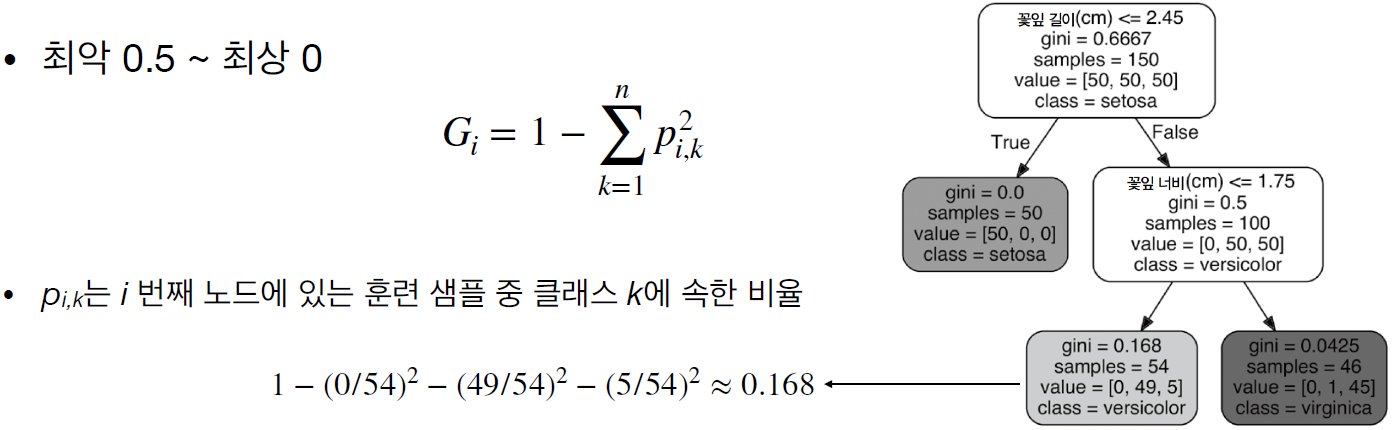

사이킷런은 이진 트리만 만드는 CART 알고리즘을 사용합니다. 그러므로 리프 노드 외의 모든 노드는 자식 노드를 두 개씩 가집니다(즉, 질문의 답은 '예 또는 '아니오'입니다). 하지만 ID3 같은 알고리즘은 둘 이상의 자식 노들르 가진 결정 트리를 만들 수 있습니다.

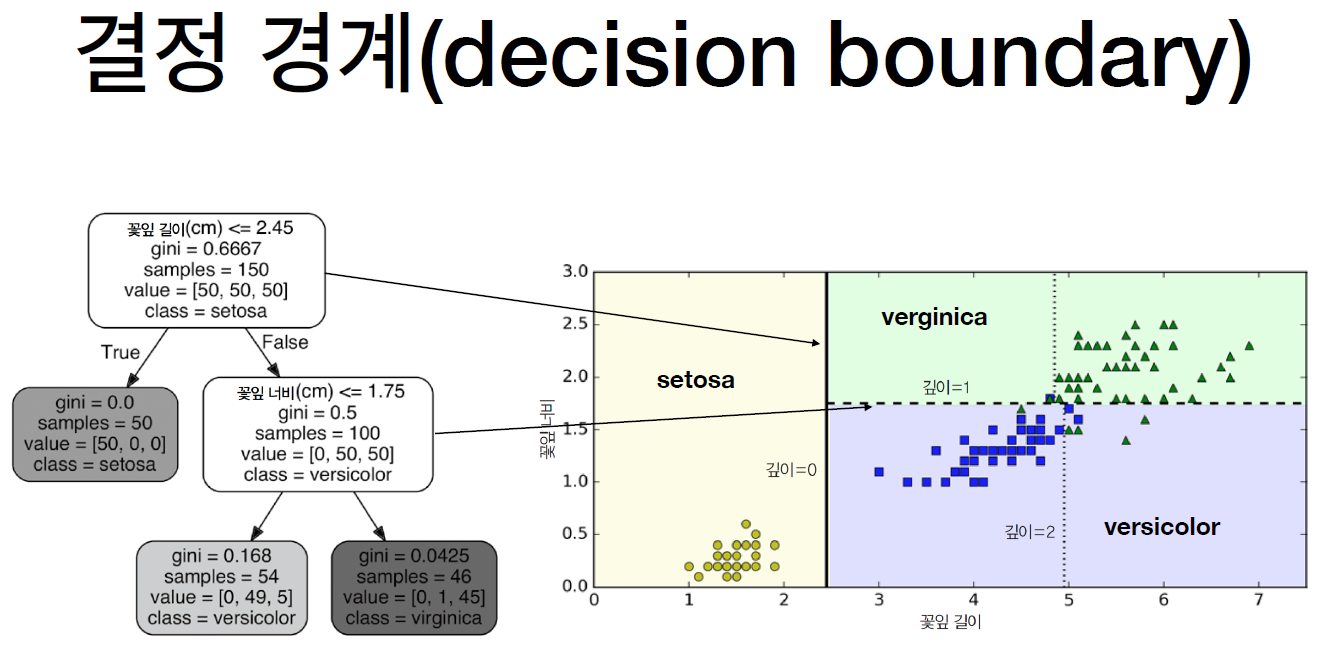<br>

위의 그림은 이 결정 트리의 결정 경계를 보여줍니다. 굵은 수직선이 루트 노드(깊이 0)의 결정 경계(꽃잎 길이 =2.45cm)를 나타냅니다. 왼쪽 영역은 순수 노드(Iris-Setosa만 있음)이기 때문에 더 이상 나눌 수 없습니다. 하지만 오른쪽 영역은 순수 노드가 아니므로 깊이 1의 오른쪽 노드는 꽃잎 너비 = 1.75cm에서 나누어집니다(파선). max_depth를 2로 설정했기 때문에 결정 트리는 더 분할되지 않았습니다. 하지만 max_depth를 3으로 하면 깊이 2의 두 노드가 각각 결정 경계를 추가로 만듭니다(점선).

## 클래스 확률 추정(p229)

결정 트리는 한 샘플이 특정 클래스 k에 속할 확률을 추정할 수도 있습니다. 먼저 이 샘플에 대해 리프 노드를 찾기 위해 트리를 탐색하고 그 노드에 있는 클래스 k의 훈련 샘풀의 비율을 반환합니다. 예를 들어 길이가 5cm이고 너비가 1.5cm인 꽃잎을 발견했다고 가정합시다. 이에 해당하는 리프 노드는 깊이 2에서 왼쪽 노드이므로 결정 트리는 그에 해당하는 확률을 출력합니다. 즉, Iris-Setosa는 0%(0/54), Iris-Versicolor는 90.7%(49/54), Iris-Virginica는 9.3%(5/54)입니다. 당연히 클래스를 하나 예측한다면 가장 높은 확률을 가진 Iris-Versicolor(클래스 1)를 출력할 것입니다.

In [12]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [13]:
tree_clf.predict([[5, 1.5]])

array([1])

## CART 훈련 알고리즘(p230)

사이킷런은 결정 트리를 훈련시키기 위해(즉, 트리를 성장시키기 위해) CART(Classification And Regression Tree) 알고리즘을 사용합니다. 이 알고리즘의 아이디어는 매우 간단합니다. 먼저 훈련세트를 하나의 특성 k의 임곗값 tk를 사용해 두 개의 서브셋으로 나눕니다(예를 들면 꽃잎의 길이 <= 2.45cm). 어떻게 k와 tk를 고를까요? (크기에 따른 가중치가 적용된) 가장 순수한 서브셋으로 나눌 수 있는 (k, tk) 짝을 찾습니다. 이 알고리즘이 최소화해야 하는 비용 함수는 아래의 식과 같습니다.

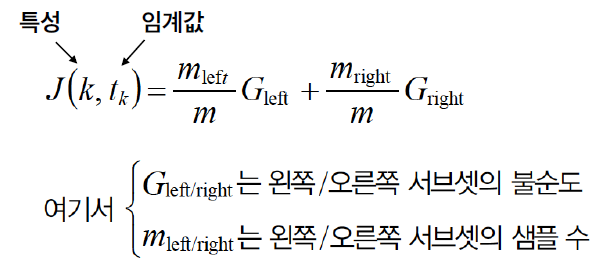

훈련 세트를 성공적으로 둘로 나누었다면 같은 방식으로 서브셋을 또 나누고 그다음엔 서브셋의 서브셋을 나누고 이런 식으로 계속 반복합니다. 이 과정은 (max_depth 매개변수로 정의된) 최대 깊이가 되면 중지하거나 불순도를 줄이는 분할을 찾을 수 없을 때 멈추게 됩니다. 다른 몇 개의 매개변수도 중지 조건에 관여합니다(min_samples_split, min_samples_leaf, min_weight_fraction_leaf, max_leaf_nodes).<br>
여기에서 볼 수 있듯이 CART 알고리즘은 탐욕적 알고리즘(greedy algorithm)입니다. 맨 위 루트 노드에서 최적의 분할을 찾으며 각 단계에서 이 과정을 반복합니다. 현재 단계의 분할이 몇 단계를 거쳐 가장 낮은 불순도로 이어질 수 있을지 없을지는 고려하지 않습니다. 탐욕적 알고리즘은 종종 납득할만한 훌륭한 솔루션을 만들어냅니다. 하지만 최적의 솔루션을 보장하지는 않습니다.

## 계산 복잡도(p231)

Question

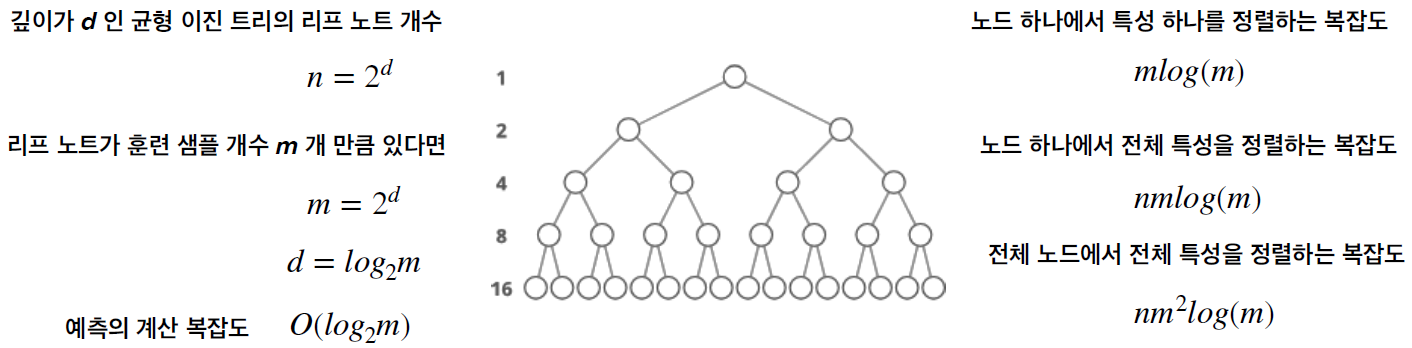<br>

* 각 노드는 하나의 특성값만 확인하기 때문에 예측에 필요한 전체 복잡도는 특성 수와 무관하게 O(log2(m))입니다. 그래서 큰 훈련 세트를 다룰 때도 예측 속도가 매우 빠릅니다.
* 훈련 세트가 (수천 개 이하의 샘플 정도로) 작을 경우 사이킷런은 (presort=True로 지정하면) 미리 데이터를 정렬하여 훈련 속도를 높일 수 있습니다.하지만 훈련 세트가 클 경우에는 속도가 많이 느려집니다.

## 엔트로피(p232)

기본적으로 지니 불순도가 사용되지만(DecisionTreeClassifier의 criterion 매개변수의 기본값은 'gini'이고, DecisionTreeRegressor의 기본값은 'mse'입니다) criterion 매개변수를 'entropy'로 지정하여 엔트로피 불순도를 사용할 수 있습니다. 엔트로피는 분자의 무질서함을 측정하는 것으로 원래 열역학의 개념입니다. 분자가 안정되고 질서 정연하면 엔트로피가 0에 가깝습니다. 이 개념은 후에 여러 분야에 퍼졌습니다. 메시지의 평균 정보 양을 측정하는 섀넌(Shannon)의 정보 이론도 여기에 포함됩니다. 여기서는 모든 메시지가 동일할 때 엔트로피가 0이 됩니다. 머신러닝에서는 불순도의 측정 방법으로 자주 사용됩니다. 어떤 세트가 한 클래스의 샘플만 담고 있다면 엔트로피가 0입니다. 아래 식에서 i번째 노드의 엔트로피 정의를 보여주고 있습니다.<br>
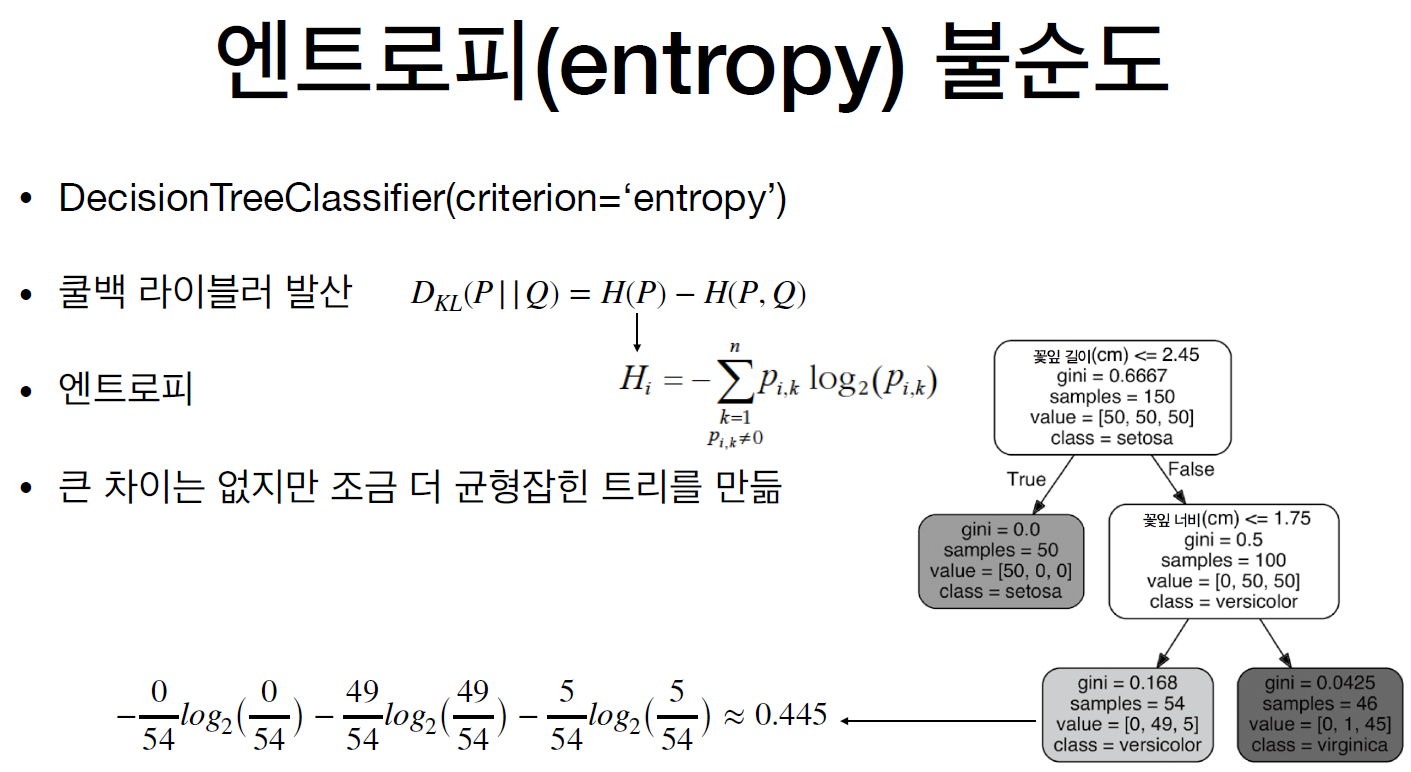

지니 불순도와 엔트로피 중 어떤 것을 사용해야 할까요? 실제로는 큰 차이가 없습니다. 즉, 둘 다 비슷한 트리를 만들어냅니다. 지니 불순도가 조금 더 계산이 빠르기 때문에 기본값으로 좋습니다. 그러나 다른 트리가 만들어지는 경우 지니 불순도가 가장 빈도 높은 클래스를 한쪽 가지(branch)로 고립시키는 경향이 있는 반면 엔트로피는 조금 더 균형잡힌 트리를 만듭니다.

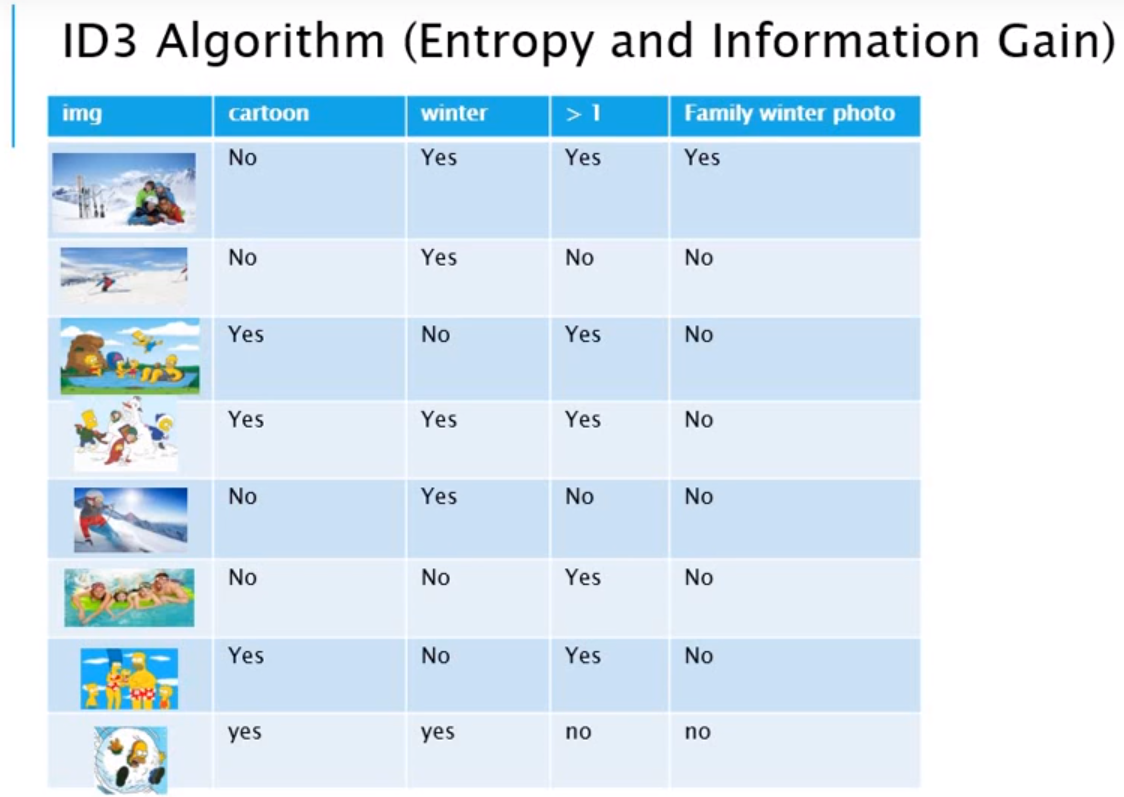

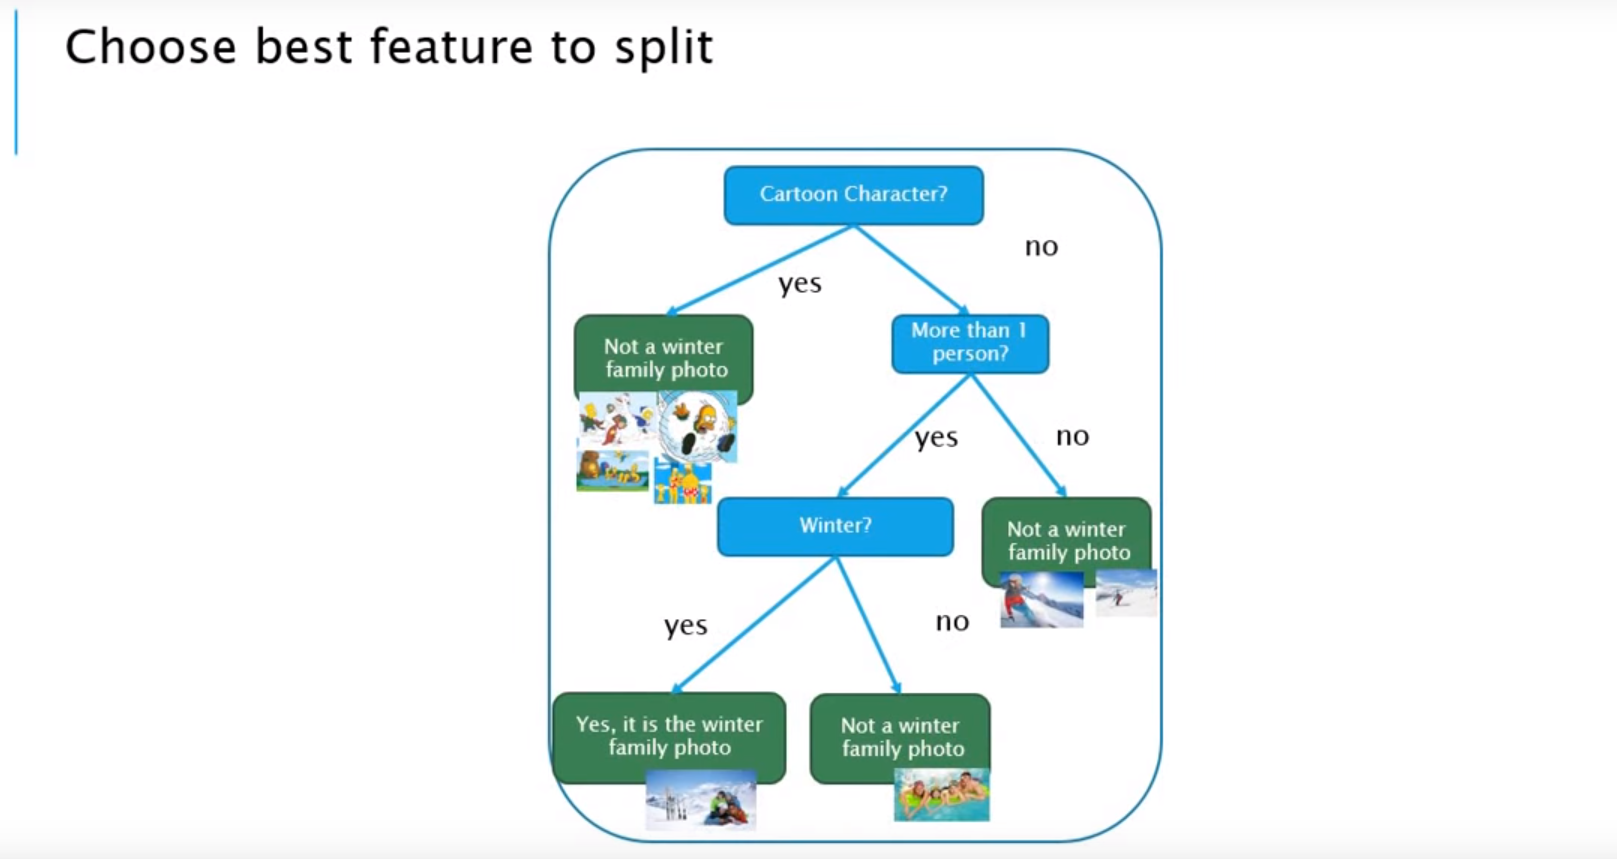

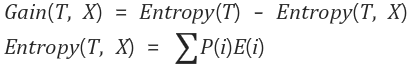

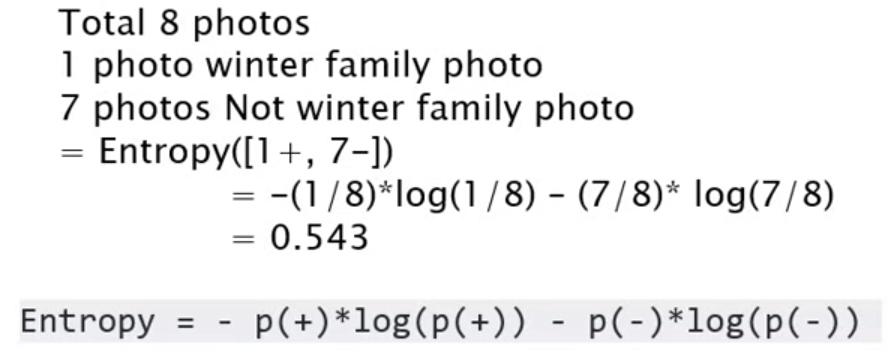

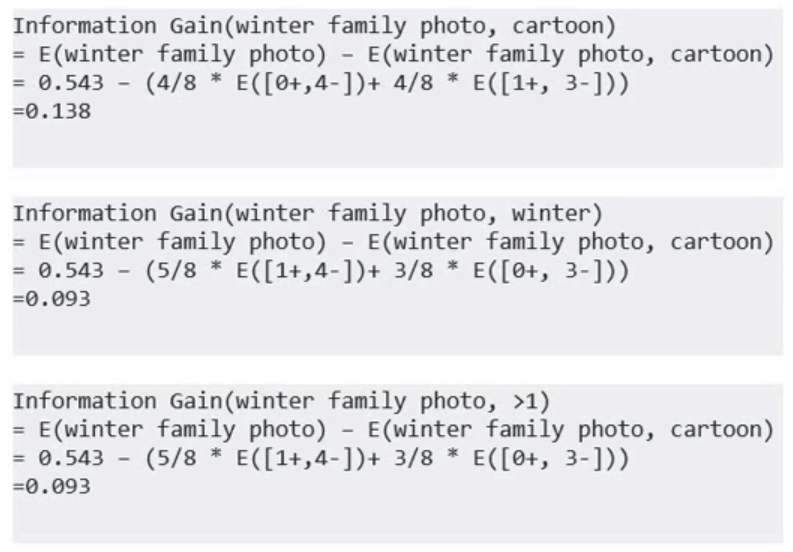

### Decision Tree + ID3알고리즘 참고 사이트
https://jihoonlee.tistory.com/16

## 규제 매개변수(p233)

결정 트리는 훈련 데이터에 대한 제약사항이 거의 없습니다(반대로 선형 모델은 데이터가 꼭 선형일 거라 가정합니다). 제한을 두지 않으면 트리가 훈련 데이터에 아주 가깝게 맞추려고 해서 대부분 과대적합되기 쉽습니다. 결정 트리는 모델 파라미터가 전혀 없는 것이 아니라(보통 많습니다) 훈련되기 전에 파라미터 수가 결정되지 않기 때문에 이런 모델을 비파라미터 모델(nonparametric model)이라고 부르곤 합니다. 그래서 모델 구조가 데이터에 맞춰져서 고정되지 않고 자유롭습니다. 반대로 선형 모델 같은 파라미터 모델(parametric model)은 미리 정의된 모델 파라미터 수를 가지므로 자유도가 제한되고 과대적합될 위험이 줄어듭니다(하지만 과소적합될 위험은 커집니다).<br>
훈련 데이터에 대한 과대적합을 피하기 위해 학습할 때 결정 트리의 자유도를 제한할 필요가 있습니다. 이미 알고 있듯이 이를 규제라고 합니다. 규제 매개변수는 사용하는 알고리즘에 따라 다르지만, 보통 적어도 결정 트리의 최대 깊이는 제어할 수 있습니다. 사이킷런에서는 max_depth 매개변수로 이를 조절합니다(기본값은 제한이 없는 것을 의미하는 None입니다). max_depth를 줄이면 모델을 규제하게 되고 과대적합의 위험이 감소합니다.<br>
DecisionTreeClassifier에는 비슷하게 결정 트리의 형태를 제한하는 다른 매개변수가 몇 개 있습니다. min_samples_split(분할되기 위해 노드가 가져아 하는 최소 샘플 수), min_samples_leaf(리프 노드가 가지고 있어야 할 최소 샘플 수), min_weight_fraction_leaf(min_samples_leaf와 같지만 가중치가 부여된 전체 샘플 수에서의 비율), max_leaf_nodes(리프 노드의 최대 수), max_features(각 노드에서 분할에 사용할 특성의 최대 수)가 있습니다. min_으로 시작하는 매개변수를 증가시키거나 max_로 시작하는 매개변수를 감소시키면 모델에 규제가 커집니다.

아래 그림은 moons 데이터셋에 훈련시킨 두 개의 결정 트리를 보여줍니다. 왼쪽 결정 트리는 기본 매개변수를 사용하여 훈련시켰고(즉, 규제가 없습니다), 오른쪽 결정 트리는 min_samples_leaf=4로 지정하여 훈련시켰습니다. 왼쪽 모델은 확실히 과대적합되었고 오른쪽 모델은 일반화 성능이 더 좋을 것 같아 보입니다.<br>
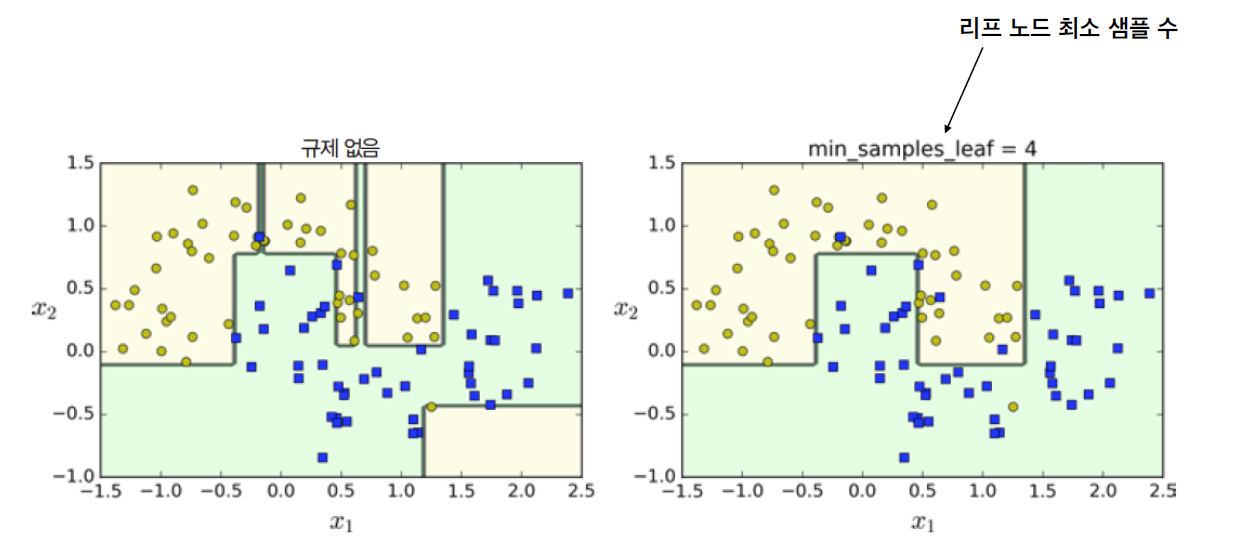

## 회귀(p234)

In [14]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

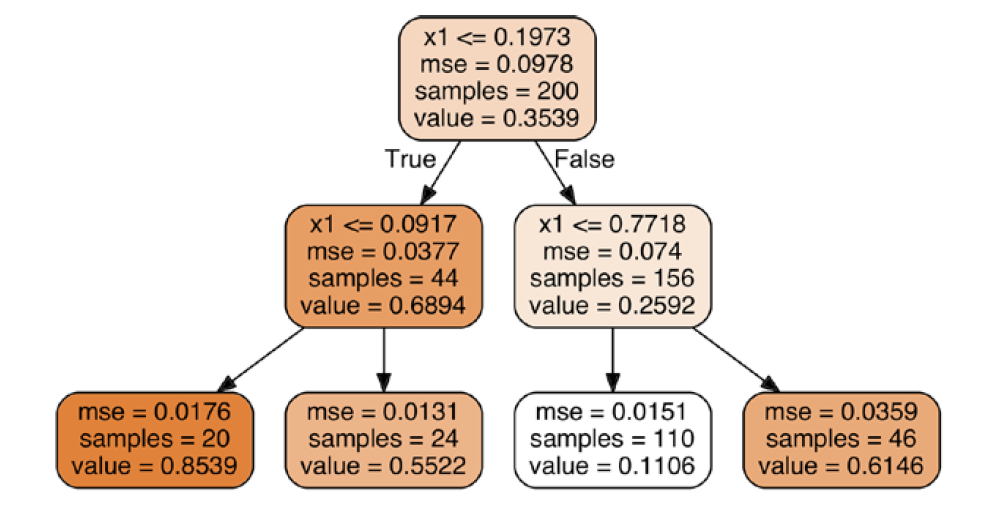

앞서 만든 분류 트리와의 주요한 차이는 각 노드에서 클래스를 예측하는 대신 어떤 값을 예측한다는 점입니다. 예를 들어 x1= 0.6인 샘플의 클래스를 예측한다고 가정해보겠습니다. 루트 노드부터 시작해서 트리를 순회하면 결국 value=0.1106인 리프 노드에 도달하게 됩니다. 이 리프 노드에 있는 110개 훈련 샘플의 평균 타깃값이 예측값이 됩니다. 이 예측값을 사용해 110개 샘풀에 대한 평균제곱오차(MSE)를 계산하면 0.0151이 됩니다.<br>
이 모델의 예측은 아래 그림의 왼쪽에 나타나 있습니다. max_depth=3으로 설정하면 오른쪽 그래프와 같은 예측을 얻게 됩니다. 각 영역의 예측값은 항상 그 영역에 있는 타깃값의 평균이 됩니다. 알고리즘은 예측값과 가능한 한 많은 샘플이 가까이 있도록 영역을 분할합니다.<br><br>

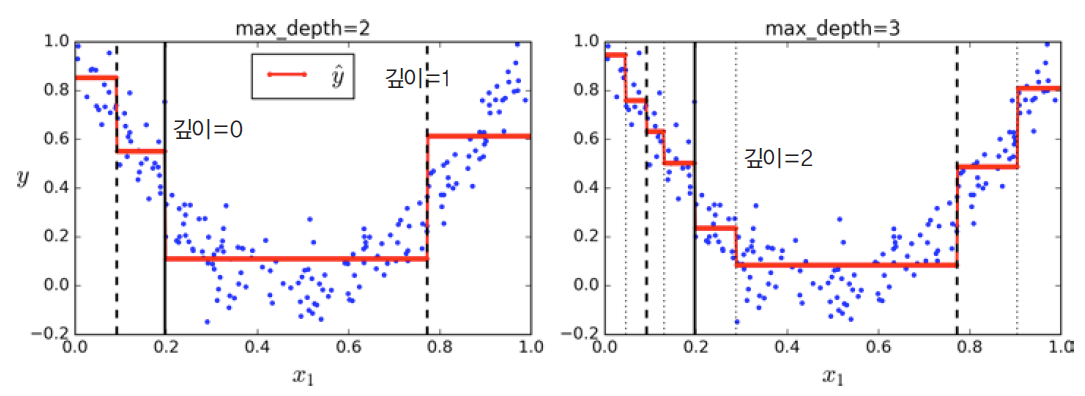

* 회귀를 위한 CART 비용 함수<br><br>

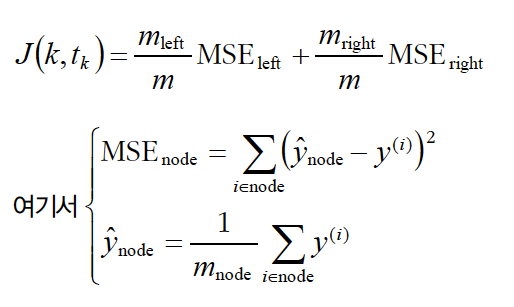

분류에서와 같이 회귀 작업에서도 결정 트리가 과대적합되기 쉽습니다. 규제가 없다면(즉, 기본 매개변수를 사용하면) 아래 그림의 왼쪽과 같은 예측을 하게 됩니다. 이 그래프는 확실히 훈련 세트에 아주 크게 과대적합되었습니다. min_samples_leaf=10으로 지정하면 아래 그림의 오른쪽 그래프처럼 훨씬 그럴싸한 모델을 만들어줍니다.<br><br>

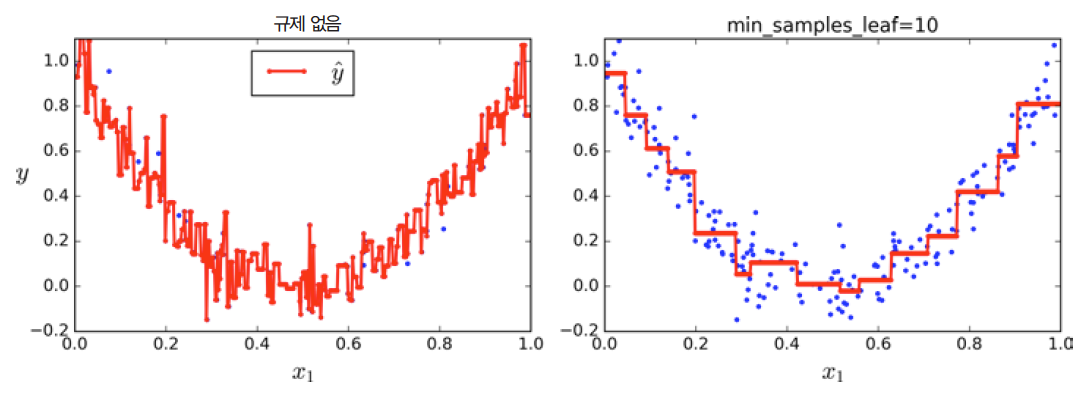

## 불안정성(p236)

아마 결정 트리가 장점이 많다는 것을 알게 되었을 것입니다. 결정 트리는 이해하고 해석하기 쉬우며, 사용하기 편하고, 여러 용도로 사용할 수 있으며, 성능도 뛰어납니다. 하지만 몇 가지 제한사항이 있습니다. 눈치 챘을지 모르겠지만 결정 트리는 계단 모양의 결정 경계를 만듭니다(모든 분할은 축에 수직입니다). 그래서 훈련 세트의 회전에 민감합니다. 아래 그림은 간단한 선형으로 구분될 수 있는 데이터셋을 예로 보여줍니다. 왼쪽의 결정 트리는 쉽게 데이터셋을 구분하지만, 데이터셋을 45도 회전한 오른쪽의 결정 트리는 불필요하게 구불구불해졌습니다. 두 결정 트리 모두 훈련 세트를 완벽하게 학습하지만 오른쪽 모델은 잘 일반화될 것 같지 않습니다. 이런 문제를 해결하는 한 가지 방법은 훈련 데이터를 더 좋은 방향으로 회전시키는 PCA 기법을 사용하는 것입니다.<br><br>

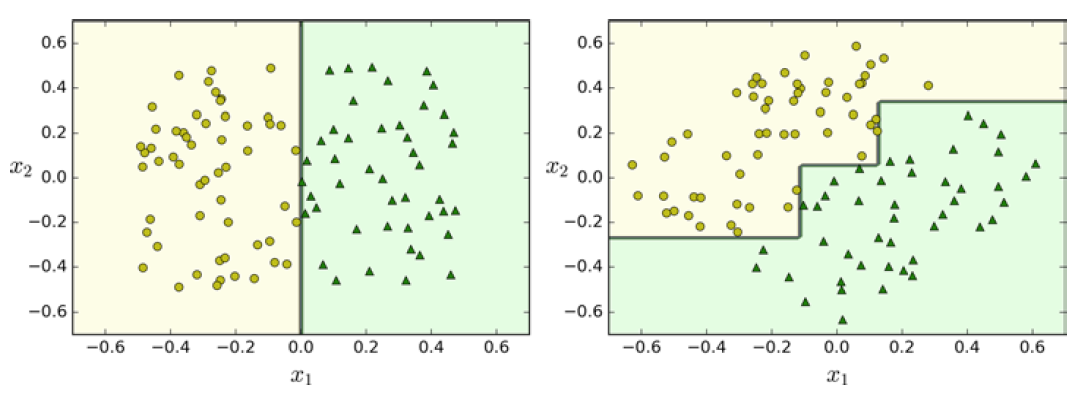

결정 트리의 주된 문제는 훈련 데이터에 있는 작은 변화에도 매우 민감하다는 것입니다. 예를 들어 훈련 세트에서 가장 넓은 Iris-Versicolor(꽃잎 길이가 4.8cm이고 너비가 1.8cm인 것)를 제거하고 결정 트리를 훈련시키면 아래와 같은 모델을 얻게 됩니다. 이전에 만든 결정 트리와는 매우 다른 모습입니다. 사실 사이킷런에서 사용하는 훈련 알고리즘은 확률적이기 때문에(random_state 매개변수를 지정하지 않으면) 같은 훈련 데이터에서도 다른 모델을 얻게 될 수 있습니다.<br><br>

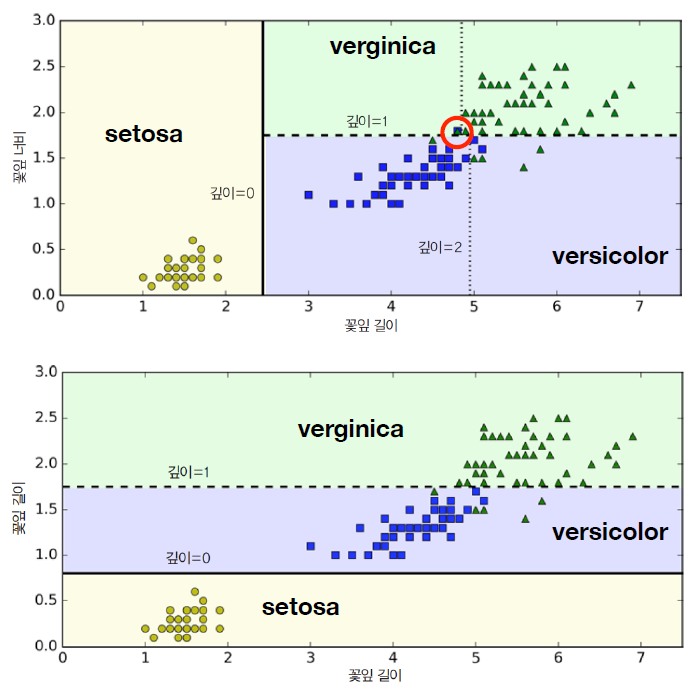
<br>
다음 장에서 보게 될 랜덤 포레스트는 많은 트리에서 만든 예측을 평균화하여 이런 불안정성을 극복할 수 있습니다.

## 연습문제

#### 1. 백만 개의 샘플을 가진 훈련 세트에서 (규제 없이) 훈련시킨 결정 트리의 깊이는 대략 얼마일까요?
m개의 리프 노드를 포함한 균형이 잘 잡힌 이진 트리의 깊이는 log2(m)을 반올림한 것과 같습니다. 이진 결정 트리(사이킷런에 있는 모든 트리는 가지가 두 개입니다)를 제한을 두지 않고 훈련시키면 훈련 샘플마다 하나의 리프 노드가 되므로 어느 정도 균형이 잘 잡힌 트리가 됩니다. 따라서 훈련 세트에 백만 개 샘플이 있다면 결정 트리의 깊이는 log2(10**6)이 될 것입니다(실제로는 완벽하게 균형 잡힌 트리가 만들어지지 않기 때문에 조금 더 늘어납니다).
<br><br>
#### 2. 한 노드의 지니 불순도가 보통 그 부모 노드보다 작을까요, 아니면 클까요? 일반적으로 작거나 클까요, 아니면 항상 작거나 클까요?
한 노드의 지니 불순도는 일반적으로 부모의 불순도보다 낮습니다. 이는 자식의 지니 불순도의 가중치 합이 최소화되는 방향으로 각 노드를 분할하는 CART 훈련 알고리즘의 비용 함수이기 때문입니다. 그러나 다른 자식 노드의 지니 불순도 감소량이 어떤 노드의 불순도 증가량보다 큰 경우라면 부모의 불순도보다 큰 노드가 생길 수 있습니다. 예를 들어 클래스 A의 샘플을 4개, 클래스 B의 샘플을 1개 포함한 노드를 생각해보겠습니다. 이 노드의 지니 불순도는 1-(1/5)^2-(4/5)^2=0.32입니다. 이 데이터셋은 1차원이고 A, B, A, A, A 순으로 늘어서 있다고 가정하겠습니다. 알고리즘이 이 노드를 두 번째 샘플 이후에 나누어 샘플 A, B를 가진 자식노드와 샘플 A, A, A를 가진 자식 노드를 만듭니다. 첫 번째 자식 노드의 지니 불순도는 1-(1/2)^2-(1/2)^2=0.5가 되어 부모보다 큽니다. 이는 다른 노드가 순수 노드가 되는 것에 대한 대가입니다. 가중치를 준 전체 지니 불순도는 2/5 * 0.5 - 3/5 * 0 = 0.2가 되어 부모의 지니 불순도보다 낮습니다.
<br><br>

#### 3. 결정 트리가 훈련 세트에 과대적합되었다면 max_depth를 줄이는 것이 좋을까요?
결정 트리가 훈련 세트에 과대적합되었다면 모델에 제약을 가해 규제해야 하므로 max_depth를 낮추는 것이 좋습니다.
<br><br>

#### 4. 결정 트리가 훈련 세트에 과소적합되었다면 입력 특성의 스케일을 조정하는 것이 좋을까요?
결정 트리는 훈련 데이터의 스케일이나 원점에 맞추어져 있는지 상관하지 않습니다. 이것이 결정 트리의 장점 중 하나입니다. 그러므로 결정 트리가 훈련 세트에 과소적합되었다고 입력 특성의 스케일을 조정하는 것은 시간낭비입니다.
<br><br>

#### 5. 백만 개의 샘플을 가진 훈련 세트에 결정 트리를 훈련시키는 데 한 시간이 걸렸다면, 천만개의 샘플을 가진 훈련 세트에 결정 트리를 훈련시키는 데는 대략 얼마나 걸릴까요?
결정 트리 훈련의 계산 복잡도는 O(n\*mlog(m))입니다. 그러므로 훈련 세트의 크기에 10을 곱하면 훈련 시간은 K = (n\*10m\*log(10m))/n\*m\*log(m)) = 10\*log(10m)/log(m)배 늘어납니다. 만약 m = 10^6이면 K = 11.7 이므로 훈련에 대략 11.7시간이 걸릴 것으로 예상할 수 있습니다.
<br><br>

#### 6. 십만 개의 샘플을 가진 훈련 세트가 있다면 presort=True로 지정하는 것이 훈련 속도를 높일까요?
데이터셋의 샘플 수가 수천 개 미만일 때 훈련 세트를 사전에 정렬하여 훈련 속도를 높일 수 있습니다. 100,000개의 샘플을 포함하고 있을 때 presort=True로 지정하면 훈련 속도가 매우 느려질 것입니다.
